In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import nltk
import string

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import VotingClassifier


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [5]:
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [6]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['spam.csv']


In [7]:
df_path = os.path.join(path, files[0])
print("Path to dataset file:", df_path)

Path to dataset file: /kaggle/input/sms-spam-collection-dataset/spam.csv


In [8]:
df = pd.read_csv(df_path, encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Performing Initial 7 Steps of Dataset Exploration:



1. df.head()  
   
2. df.shape  

3. df.isnull().sum()  

4. df.duplicated().sum()  

5. df.info()  

6. df.describe()  

7. df.corr()  



In [9]:
df.shape

(5572, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df = df[['text', 'target']]

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()

,text,target
count,5169,5169
unique,5169,2
top,Rofl. Its true to its name,ham
freq,1,4516


In [17]:
print(df.columns.tolist())


['text', 'target']


In [18]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [19]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


# **EDA**

In [20]:
df['target'].value_counts()

,count
target,
0,4516
1,653


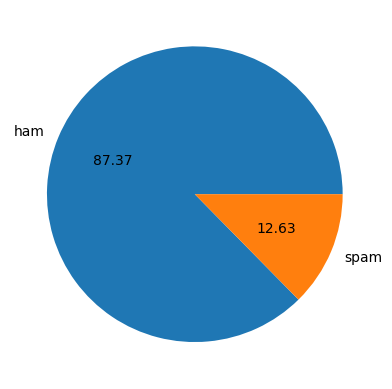

In [21]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:
nltk.download('punkt_tab') # Used for tokenization

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
df['num_characters'] = df['text'].apply(len) # Creating a new colum for number of caharcters in text column


In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # Creating a new colum for number of words

In [25]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # Creating a new colum for number of sentences

In [26]:
df.head()

,text,target,num_characters,num_words,num_sentence
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [27]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

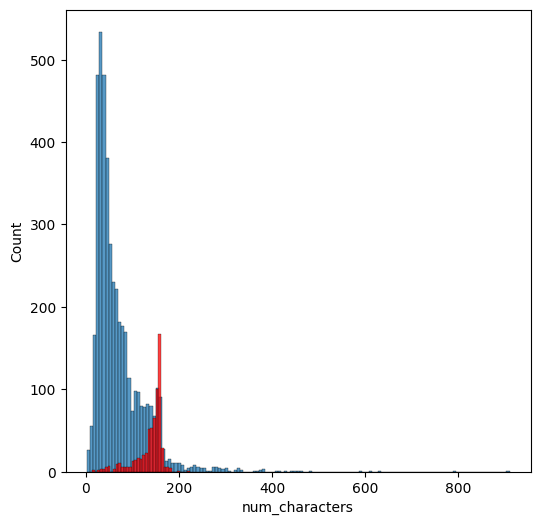

In [30]:
plt.figure(figsize=(6,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

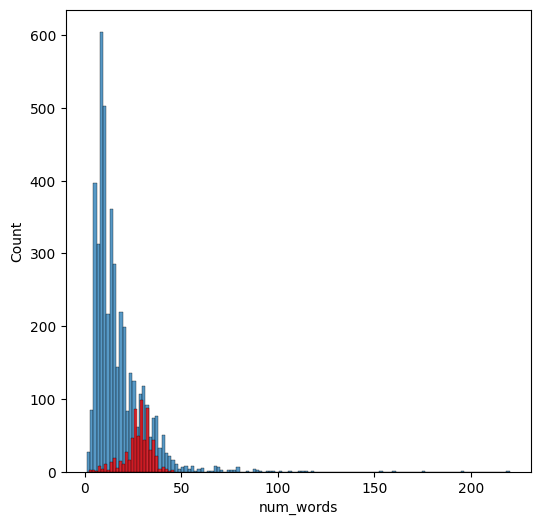

In [31]:
plt.figure(figsize=(6,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

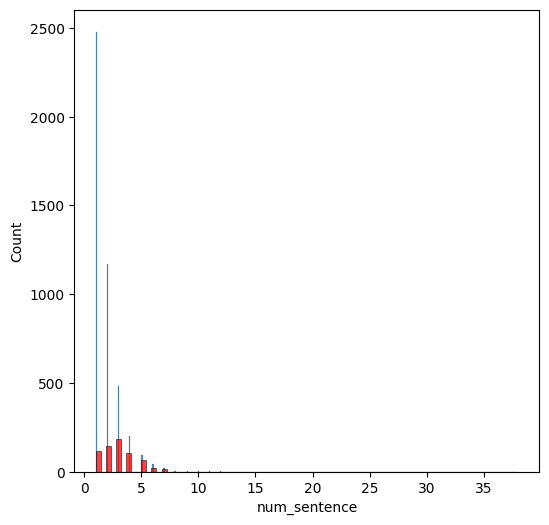

In [32]:
plt.figure(figsize=(6,6))
sns.histplot(df[df['target'] == 0]['num_sentence'])
sns.histplot(df[df['target'] == 1]['num_sentence'],color='red')

<Figure size 400x400 with 0 Axes>

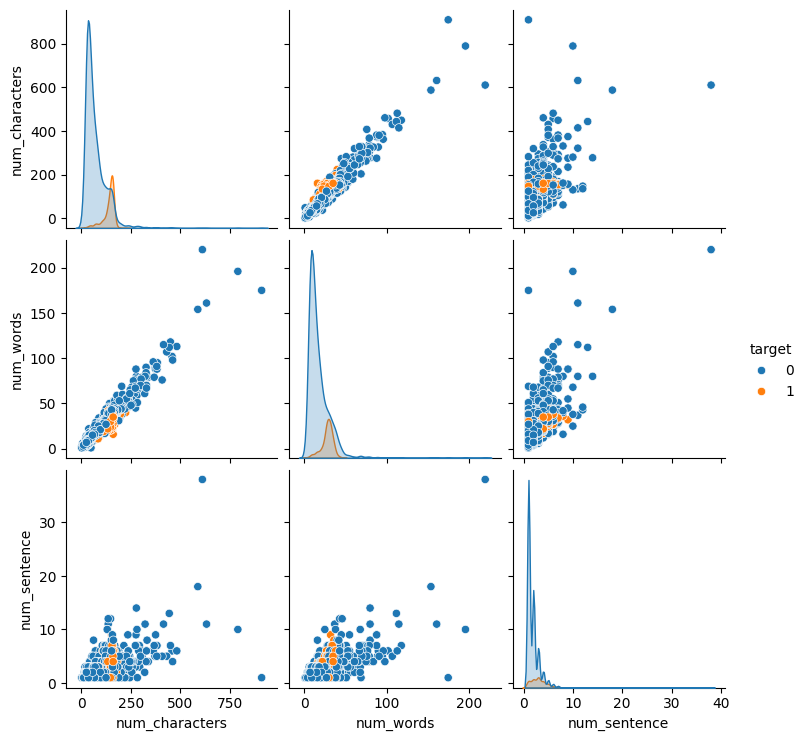

In [74]:
plt.figure(figsize=(4,4))

sns.pairplot(df,hue='target')

<Axes: >

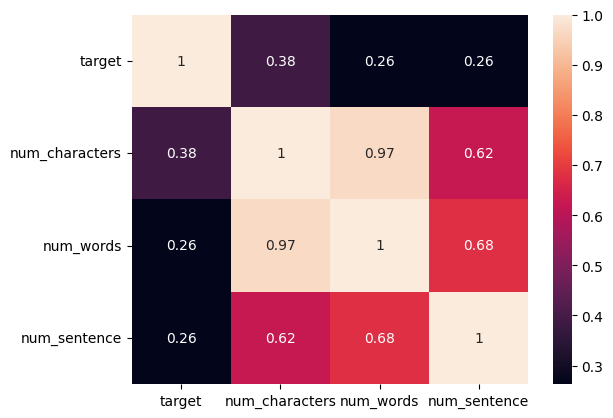

In [75]:
df_corr= df.select_dtypes(include=np.number)
sns.heatmap(df_corr.corr(),annot=True)

# Data Preprocessing



*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming item






In [35]:
nltk.download('stopwords')
#stopwords.words('english')
#string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
ps = PorterStemmer()

In [37]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
        y.append(ps.stem(i))
  return " ".join(y)

In [38]:
df['transformed'] = df['text'].apply(transform_text)

In [39]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

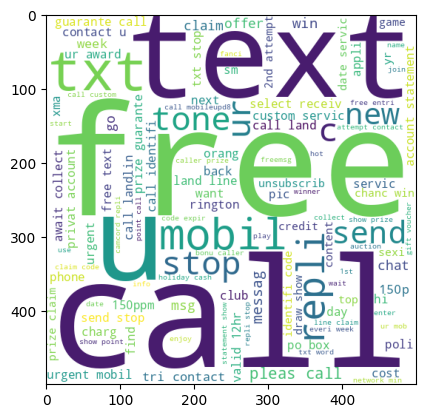

In [40]:
spam_wordcloud = wc.generate(df[df['target'] == 1]['transformed'].str.cat(sep=" "))
plt.imshow(spam_wordcloud)

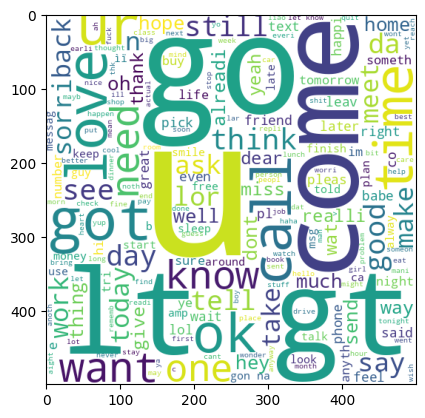

In [41]:
ham_wordcloud = wc.generate(df[df['target'] == 0]['transformed'].str.cat(sep=" "))
plt.imshow(ham_wordcloud)

In [42]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
#spam_corpus

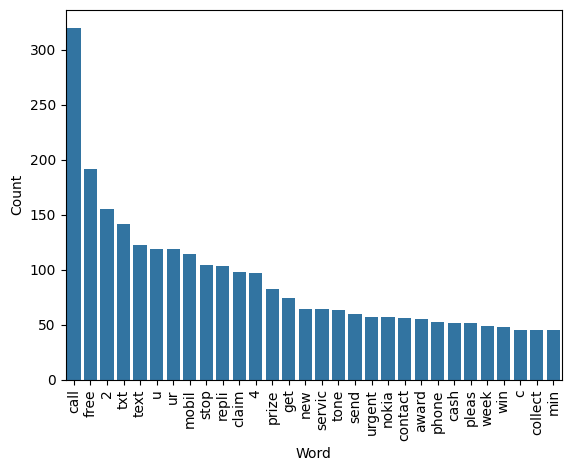

In [44]:
common_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=common_spam_words)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
#ham_corpus


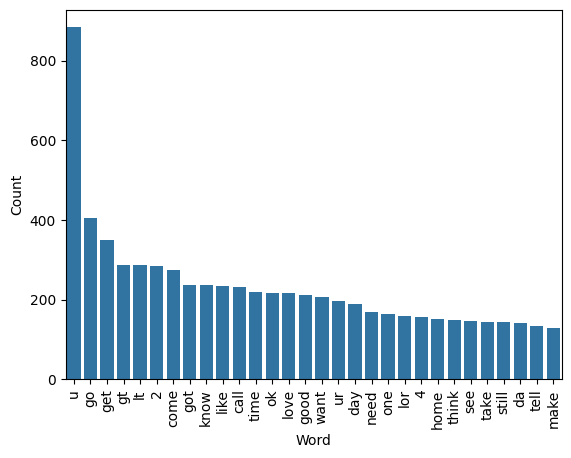

In [47]:
common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=common_ham_words)
plt.xticks(rotation='vertical')
plt.show()

# **Model Building**

In [48]:
cv = CountVectorizer(max_features=3000,stop_words='english')

In [49]:
X = cv.fit_transform(df['transformed']).toarray()

In [50]:
X.shape

(5169, 3000)

In [51]:
y = df['target'].values

In [52]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
gn = GaussianNB()
mbn = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gn.fit(X_train,y_train)
y_pred = gn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


In [55]:
mbn.fit(X_train,y_train)
y_pred_m = mbn.predict(X_test)
print(accuracy_score(y_test,y_pred_m))
print(confusion_matrix(y_test,y_pred_m))
print(precision_score(y_test,y_pred_m))

0.97678916827853
[[883  13]
 [ 11 127]]
0.9071428571428571


In [56]:
bnb.fit(X_train,y_train)
y_pred_b = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_b))
print(confusion_matrix(y_test,y_pred_b))
print(precision_score(y_test,y_pred_b))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


In [57]:
tfid = TfidfVectorizer(max_features=3000,stop_words='english')

In [58]:
new_X = tfid.fit_transform(df['transformed']).toarray()

In [59]:
new_y = df['target'].values

In [60]:
X_train_new , X_test_new, y_train_new, y_test_new = train_test_split(new_X,new_y,test_size=0.2,random_state=2)

In [61]:
gn.fit(X_train_new,y_train_new)
y_pred = gn.predict(X_test_new)
print(accuracy_score(y_test_new,y_pred))
print(confusion_matrix(y_test_new,y_pred))
print(precision_score(y_test_new,y_pred))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [62]:
mbn.fit(X_train_new,y_train_new)
y_pred_m = mbn.predict(X_test_new)
print(accuracy_score(y_test_new,y_pred_m))
print(confusion_matrix(y_test_new,y_pred_m))
print(precision_score(y_test_new,y_pred_m))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [63]:
bnb.fit(X_train_new,y_train_new)
y_pred_b = bnb.predict(X_test_new)
print(accuracy_score(y_test_new,y_pred_b))
print(confusion_matrix(y_test_new,y_pred_b))
print(precision_score(y_test_new,y_pred_b))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:
def train_classifier(clf,X_train_new,y_train_new,X_test_new,y_test_new):
  clf.fit(X_train_new,y_train_new)
  y_pred = clf.predict(X_test_new)
  accuracy = accuracy_score(y_test_new,y_pred)
  precision = precision_score(y_test_new,y_pred)
  return accuracy,precision

In [67]:
accuracies = []
precisions = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(
        clf, X_train_new, y_train_new, X_test_new, y_test_new
    )

    print(f"Classifier: {name}")
    print(f"Accuracy : {current_accuracy:.4f}")
    print(f"Precision: {current_precision:.4f}")
    print("-" * 30)

    accuracies.append(current_accuracy)
    precisions.append(current_precision)


Classifier: SVC
Accuracy : 0.9778
Precision: 0.9752
------------------------------
Classifier: KN
Accuracy : 0.9062
Precision: 1.0000
------------------------------
Classifier: DT
Accuracy : 0.9294
Precision: 0.8421
------------------------------
Classifier: LR
Accuracy : 0.9584
Precision: 0.9524
------------------------------
Classifier: RF
Accuracy : 0.9749
Precision: 0.9667
------------------------------
Classifier: AdaBoost
Accuracy : 0.8975
Precision: 0.9000
------------------------------
Classifier: BgC
Accuracy : 0.9681
Precision: 0.9200
------------------------------
Classifier: ETC
Accuracy : 0.9807
Precision: 0.9758
------------------------------
Classifier: GBDT
Accuracy : 0.9429
Precision: 0.9647
------------------------------
Classifier: xgb
Accuracy : 0.9671
Precision: 0.9643
------------------------------


In [68]:
performance_df = pd.DataFrame({'Algo':clfs.keys(),'Accuracy':accuracies,'Precision':precisions}).sort_values('Precision',ascending=False)
performance_df

,Algo,Accuracy,Precision
1,KN,0.906190,1.000000
7,ETC,0.980658,0.975806
0,SVC,0.977756,0.975207
4,RF,0.974855,0.966667
8,GBDT,0.942940,0.964706
9,xgb,0.967118,0.964286
3,LR,0.958414,0.952381
6,BgC,0.968085,0.920000
5,AdaBoost,0.897485,0.900000
2,DT,0.929400,0.842105


In [69]:
performance_df1 = pd.melt(performance_df, id_vars = "Algo") #melt used for easier group wise comparisons
performance_df1

,Algo,variable,value
0,KN,Accuracy,0.906190
1,ETC,Accuracy,0.980658
2,SVC,Accuracy,0.977756
3,RF,Accuracy,0.974855
4,GBDT,Accuracy,0.942940
5,xgb,Accuracy,0.967118
6,LR,Accuracy,0.958414
7,BgC,Accuracy,0.968085
8,AdaBoost,Accuracy,0.897485
9,DT,Accuracy,0.929400


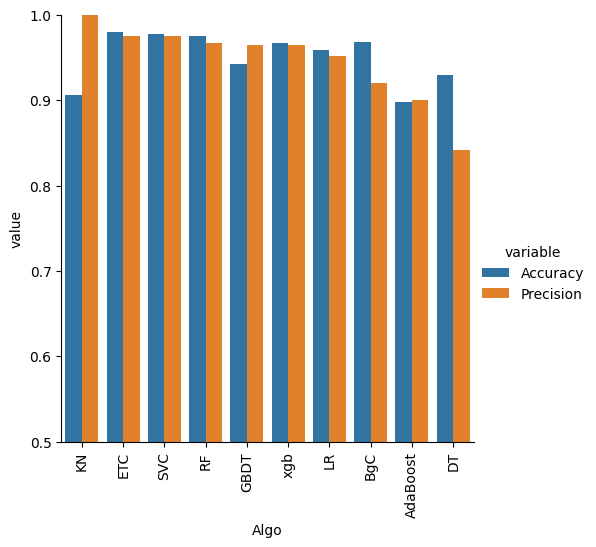

In [70]:
sns.catplot(x='Algo', y='value', hue='variable',data=performance_df1, kind='bar',height=5) # catplot is a Seaborn figure-level function for visualizing categorical data with multiple plot types
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mbn), ('et', etc)],voting='soft')

In [72]:
voting.fit(X_train_new,y_train_new)
y_pred = voting.predict(X_test_new)
print(accuracy_score(y_test_new,y_pred))
print(precision_score(y_test_new,y_pred))

0.9816247582205029
0.9917355371900827


In [73]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mbn,open('model.pkl','wb'))